In [3]:
import numpy as np

a = np.array([1,2,3])
a2 = np.array([1,2,3])

In [66]:
 f4 = np.arange(0,20).reshape(5,-1)

In [67]:
s,f = f4.shape


In [97]:
w = np.arange(f)

In [77]:
w,f4

(array([0, 1, 2, 3]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]]))

In [83]:
w.reshape(1,-1).shape

(1, 4)

In [87]:
w = w.reshape(1,-1)

In [98]:
f4.shape,w.shape

((5, 4), (4,))

In [99]:
np.dot(f4,w)

array([ 14,  38,  62,  86, 110])

In [123]:
class LinearReg:
  def __init__(self,lr = 0.001, epochs = 1000):
    self.lr = lr
    self.epochs = epochs
    self.w = None
    self.b = None
    self.n = None

  def fit(self, X,y):
    self.X = X
    self.y = y
    n_samples,n_features = X.shape
    self.w = np.zeros(n_features)
    self.b = 0
    self.n = n_samples

    # learing
    losses = []
    for i in range(self.epochs):
      y_hat = np.dot(X,self.w) + self.b


      loss = (1/self.n)* np.sum(self.y-y_hat)


      dw = (1/self.n) * np.dot(X.T, (y_hat-y))
      db = (1/self.n) * np.sum((y_hat-y))

      # update w and b
      self.w = self.w - (self.lr * dw)
      self.b = self.b - (self.lr * db)

      print("---------------------------------------------------- Loss is " ,loss )
      losses.append(loss)
    return losses
  def predict(self,X):
    return np.dot(X,self.w ) + self.b



Testing

In [117]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [163]:
X,y = datasets.make_regression(n_samples=1000, n_features = 1, noise= 20 ,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,shuffle=1234 ,test_size=0.2)

In [143]:
import matplotlib.pyplot as plt

array([ 0.6543574 , -0.15539723, -1.40525437,  0.45028443, -1.04913583,
        0.87843108,  0.72983317,  2.01611309,  1.09733927, -0.88698343])

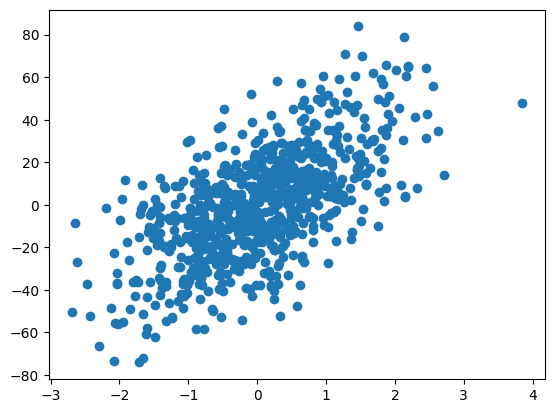

In [165]:
plt.scatter(X_train,y_train)

In [179]:
reg = LinearReg(epochs=1000,lr = 0.01)

In [180]:
loss = reg.fit(X_train,y_train)

---------------------------------------------------- Loss is  0.07702317160385903
---------------------------------------------------- Loss is  0.07379508544212626
---------------------------------------------------- Loss is  0.0706223415386836
---------------------------------------------------- Loss is  0.0675041700301864
---------------------------------------------------- Loss is  0.06443981078392753
---------------------------------------------------- Loss is  0.06142851328144744
---------------------------------------------------- Loss is  0.058469536503488656
---------------------------------------------------- Loss is  0.05556214881627653
---------------------------------------------------- Loss is  0.05270562785911352
---------------------------------------------------- Loss is  0.04989926043327387
---------------------------------------------------- Loss is  0.04714234239217916
---------------------------------------------------- Loss is  0.04443417853284643
-----------------

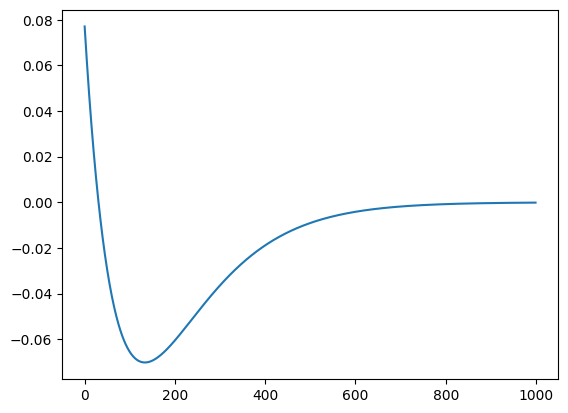

In [168]:
plt.plot(loss)

In [169]:
def mse(pred,y):
   return np.mean((pred-y)**2)

In [170]:
reg.w

array([16.68344459])

In [171]:
pred = reg.predict(X_test)

In [172]:
mse(pred,y_test)

431.59713015615023

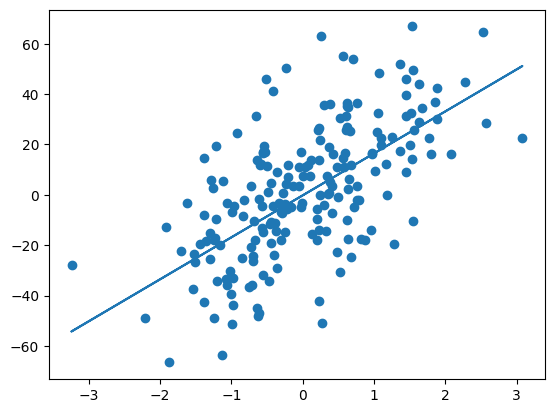

In [174]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)



In [176]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
regression_model = LinearRegression()

# Fit the model to the training data
regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 431.59967479663896
R-squared (R2) Score: 0.375734632146025


My class

In [181]:
# Make predictions on the test data
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 431.59713015615023
R-squared (R2) Score: 0.37573831271165903
